Packet rate analysis + signal strengths plotting

In [88]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})


In [1]:

#reading from raw data
import fileinput
import json 
json_lines_raw = []
for line in fileinput.input(["/home/ubuntu/ArenaData/Arena_raw/2015-07-05.json"]):
    jsline = json.loads(line)
    data = []
    data.append(jsline["value"]["sourceMac"])
    data.append(jsline["value"]["localMac"])
    data.append(jsline["measurementTimestamp"])
    data.append(jsline["value"]["droneId"])
    data.append(jsline["value"]["signal"])
    json_lines_raw.append(data)
print(json_lines_raw[0])
              

['32bf72d3-d707-4c37-b9b5-6318187de63f', 0, 1436047299132, '107', -68]


In [2]:
localMac = dict()
for line in json_lines_raw:
    localMac[line[0]] = line[1]
    

Finding the most overloaded drone (112)

In [3]:
numberOfMeasurementsForDrone = dict()
for line in json_lines_raw:
    droneId = line[3]
    if droneId not in numberOfMeasurementsForDrone.keys():
        numberOfMeasurementsForDrone[droneId] = 0
    numberOfMeasurementsForDrone[droneId] +=1    
maxMeasurements = 0

maxDroneId = 0
for droneId in numberOfMeasurementsForDrone.keys():
    if numberOfMeasurementsForDrone[droneId] > maxMeasurements:
        maxMeasurements = numberOfMeasurementsForDrone[droneId]
        maxDroneId = droneId
print(maxDroneId)
print(maxMeasurements)

112
2920472


Computing the timestamps for every address visible at drone 112

In [4]:
timestamps112 = dict()
for line in json_lines_raw:
    if line[3]=="112":
        address = line[0]
        if address not in timestamps112.keys():
            timestamps112[address] = []        
        timestamps112[address].append(line[2])
for address in timestamps112.keys():
    timestamps112[address].sort()  

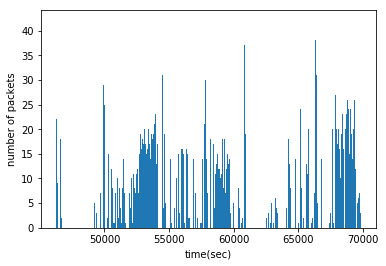

In [5]:
#plotting packet arrival rate at drone 112
import matplotlib.pyplot as plt
#myAddress = 'e1deda99-163f-4b68-9ade-e1f05d070bf2'#the largest one
myAddress = '8b8a2356-d11e-4bd5-bb35-d8370bf48b1e'#randomized
times112MyAddress = []
minTime = 1436047367297
for timestamp in timestamps112[myAddress]:
    time = (timestamp - minTime)/1000
    times112MyAddress.append(time)
plt.hist(times112MyAddress, bins = 2000)
plt.ylabel('number of packets')
plt.xlabel('time(sec)')
axes = plt.gca()
plt.show()


In [6]:
#computing the interarrival times for every address at drone 112
delays112 = dict()
for address in timestamps112.keys():
    if address not in delays112.keys():
        delays112[address] = []
    oldTimeStamp = 0        
    for timestamp in timestamps112[address]:
        if oldTimeStamp > 0:
            delay = (timestamp - oldTimeStamp)
            delays112[address].append(delay)
        oldTimeStamp = timestamp

In [7]:
#print(json_lines_raw[30000])
#print(len(delays))
address1 = '32bf72d3-d707-4c37-b9b5-6318187de63f'
address2 = '3be779a3-1e1a-4b79-8ad0-c555f5124e7c'

print(delays112[address1])
print(delays112[address2])

[44966, 35110, 33917, 173747, 2086, 3025, 305767, 98703, 499661, 725344, 547, 119, 18, 6197, 22, 43702, 82, 42, 80490, 72, 20, 8578, 35, 122, 99575, 42985, 41, 8266, 19, 21, 18147, 128512, 234440, 44, 63605, 27889, 281, 1436, 40, 3171, 2552, 123, 7874, 30318, 58317, 52725, 40006, 27463, 13650, 40, 17981, 33914, 82, 65825, 93, 389841, 83, 40, 129854, 129854, 433341, 2907, 7511, 71194, 22768, 118240, 11971, 10106, 119787, 138089, 454522, 62688, 1618, 22, 7998, 1223, 22, 89, 3833, 68559, 3248, 42, 19, 21, 573, 1549145, 40, 469, 531994, 3315042, 42, 1564348, 2216568, 125, 83]
[11642, 59388, 427802, 11896, 11845, 41, 12859, 35740, 17668, 50771, 224547, 7624, 45328, 30299, 12785, 21, 34805, 358229, 336466, 1087876, 4201, 458812, 21, 104735, 271604, 38809, 23, 624703, 19, 723127, 29117, 23, 3990, 19443, 12800, 12747, 51033, 32693, 277624, 6143, 3916, 3063, 537, 7377, 16165, 34792, 11946, 27, 40, 10836, 207, 2476, 19, 2656, 20796, 19, 23, 49490, 13577, 21, 68194, 119638, 6506, 13484, 9201, 284

In [8]:
#computing statistics of non-randomized addresses for drone 112 (most overloaded drone)
import numpy as np
averageDelay0_112= dict()
medianDelay0_112 = dict()
stderrDelay0_112 = dict()
for address in delays112.keys():
    if localMac[address] == 0:
        if address not in averageDelay0_112.keys():
            if len(delays112[address]) > 1:
                delaysArray = np.array(delays112[address])
                averageDelay0_112[address] = np.mean(delaysArray)
                medianDelay0_112[address] = np.median(delaysArray)
                stderrDelay0_112[address] = np.std(delaysArray)
                if len(delays112[address]) > 200:
                    print(address)
                if len(delays112[address])> 1000:    
                    print("long " +  address)
print('**********************************************************************')                
#computing statistics of randomized addresses for drone 112
averageDelay1_112= dict()
medianDelay1_112 = dict()
stderrDelay1_112 = dict()
for address in delays112.keys():
    if localMac[address] == 1:
        if address not in averageDelay0_112.keys():
            if len(delays112[address]) > 1:
                delaysArray = np.array(delays112[address])
                averageDelay1_112[address] = np.mean(delaysArray)
                medianDelay1_112[address] = np.median(delaysArray)
                stderrDelay1_112[address] = np.std(delaysArray)       
                if len(delays112[address]) > 200:
                    print(address)
                if len(delays112[address])> 1000:    
                    print("long " +  address)    

f88adfbb-5f6a-46ad-a558-8cc24814da04
long f88adfbb-5f6a-46ad-a558-8cc24814da04
a8c5f560-9849-416b-8d7e-c442b9055b05
long a8c5f560-9849-416b-8d7e-c442b9055b05
5a289592-c056-4cbc-ac18-90df83166d48
497cbba0-040d-465e-b8f2-d10978dd30f8
b90ee846-b2ef-464a-88ab-9c4d44c2d1b5
9a5e717b-6699-4ec3-8fe7-a2136072eb5d
7c890eca-d0ed-4fd6-8b5f-748507b8708f
long 7c890eca-d0ed-4fd6-8b5f-748507b8708f
6df4cdbc-0a22-4860-a034-9ed6891f687b
d0b81bf4-75d6-455e-84b5-74ea2162d537
f70cec8b-8162-461c-a8b2-978bc0289413
f61a8c24-2644-4f8a-a62e-fe3c4bfcdd74
long f61a8c24-2644-4f8a-a62e-fe3c4bfcdd74
ab0856cf-9d60-4c0e-a088-b916ed7031f8
long ab0856cf-9d60-4c0e-a088-b916ed7031f8
d1fa6312-afcd-4efa-8ccb-7e07ad1189c0
0a4b723c-3666-4b3f-89ab-81a97708dce6
c5466bcd-199e-48fb-9a70-2b3be13a6981
702a6426-c825-4061-bf5b-804017bf7bb5
e7a936ff-29e4-4695-a465-1b1572febd32
515ab6dd-fdca-4566-81ab-334208320bc9
7e6d34b1-7b73-4df2-9f0f-45a5c1adee93
e3d06579-7d08-4d07-a66c-d8931d6e7074
cff7114c-6ec4-4878-a8fe-f2b362a619d6
63345426-69e6

5cb08f3d-217b-463b-9fae-2f45dd5dc172
bf01191b-9067-4e67-b6ef-476160d221a8
3dd7cc36-bf80-4904-a937-0a2c154948c7
b16a7410-ac7a-4a87-8a33-35876f896e40
3f38e359-e6a4-4090-bac1-5bedcf2a03fe
6134c911-5e88-4c7d-8711-db664d6d0c36
long 6134c911-5e88-4c7d-8711-db664d6d0c36
cd927bfb-1dbf-4c7a-aa67-085e37ac643e
c8d7c332-a9da-4b70-b1e3-d8da3f8e625b
c00aa43d-4ec4-4664-8763-badc6541f308
2b305baa-a738-4562-8a58-f886f033822e
2fdde8c1-8b03-402f-a2c9-991626a4fec9
ce51280a-82bd-4205-9e45-0cf35392fda1
long ce51280a-82bd-4205-9e45-0cf35392fda1
f7c7165f-7db5-45fc-b417-42c32a6b2ca9
4a97e06b-122f-4807-a241-1b7954d4ead2
c357f20e-4a2c-4371-bed4-b304a24ddb39
5b2e56aa-e04d-4147-98cf-3d3f241b8049
long 5b2e56aa-e04d-4147-98cf-3d3f241b8049
101c1b69-b7ed-49c7-8e9c-6aa0ceed1475
38bc28f4-bef3-43f2-83b2-db7a1b201e00
c3a875ad-d364-4446-a7c0-f95574a0ca39
70f17024-1bf6-4eee-884f-f166f7d7713c
03e58b8c-636e-4ea0-9ca3-b1d45c8364b7
3238d25c-8897-4cf4-a615-01cbb1d25f34
b28ef7e5-eeed-4d22-97ad-57515a6b8b37
1ea21214-d93e-4ec2-ae35

333be7e6-077c-4a6c-ba38-c43765d8a0f2
7e9aa22c-5393-4545-b0c8-973f0514f44f
2ba65d03-40b5-435d-b0cd-bb82e916c4e7
eda3d16e-a29b-448a-a524-bfa8e1e4626e
5b23c43d-8933-4125-994c-4f357160d2a5
6368d5e2-8613-438e-a3a4-bd7927b6ca9e
17506ad9-fd42-44d8-a0a3-d45bbb8fb918
5bcedbb2-d338-4202-83bc-8abf2dcdb4b4
d6fb64bd-6772-4cee-aa72-f0b614424fd1
65a3119e-a07c-41e2-9337-d3419935286a
156b0425-62a1-4660-b8a8-eebd41673725
aa0e2845-acad-40f4-b1c4-864e6b0b31bf
f12c6171-bac4-4fb2-a5a1-025c757788f9
d1d41d0f-8922-4070-885e-37472cc1badc
b1dd5b61-008e-44eb-b59f-faf3760ba3b2
2f4df837-b5aa-451a-ac06-2782cc5f08c5
8860092d-0ded-437f-af97-7fdad94b05a2
5c31b41d-520c-4e60-91ad-d91dcb506a56
f103f9db-23e9-431e-b996-f3f9b3bb9952
a5b8b115-6edf-414b-9b07-284b01e40c2c
3d365665-cfea-4344-a757-a54aaafc0494
0924490d-4873-4db4-924b-88138023b958
long 0924490d-4873-4db4-924b-88138023b958
03101973-0af2-4509-9298-b71c54fb8fc7
ccb7814f-e5db-4a14-9ea7-f94296332d98
596b157f-5c0c-4ba9-8117-b73e938faa80
3736bdb8-0fd0-49b0-9829-238ffb493

929927fe-c898-46fe-9d6a-c022e4031f9b
a77663a5-b154-457a-b011-144da6071f16
ad90b545-4300-4551-b537-0c64ed3619f3
5d228b03-4cb3-4743-8a54-d20c993ab19f
44fc93b7-c8a6-476b-943d-f387ef9b5af7
ab66dfc0-49a9-4d5e-96a3-acc887fefd00
2ea1a386-2795-46a5-9483-4447b3749ef8
bebcac75-9ccc-4b48-930b-5842919eca70
2df0a1a5-5b78-422c-9ff5-550b6b552c06
f402f3ef-56d8-4878-b1bb-a0b57f705fc0
6bb5bda7-af2e-4b2a-a71d-b09b8533061d
68496f6f-a1a9-4964-87b7-ac172e7414d4
7d926908-697f-46db-a526-545b8bb81ad3
2f837b09-2e65-4710-91e2-a28182a288db
fe14000a-acd2-41fa-8459-802c6f8c04a9
f00a1c1f-6ca6-456b-b448-56e10c92c845
60aa9714-9e83-4415-9c80-ba15231dffda
83b7e939-6049-4e9d-86bc-0b6ca28abdbd
665428e6-44bd-421c-858e-e0bebcb2dcaf
3c61a598-6c39-4d94-8cd4-8984de759f61
e489ee85-552d-4b3a-93b6-a81d56eb6b51
f553197a-6eff-4e55-b5f3-eb515df2bbaf
fc24354c-3198-43e7-a3a7-c98e77232b8c
3586f91a-4090-4503-a5c4-e54b3adb813d
db64b8a6-2e84-4126-b3f5-21efd638de8c
8465bf90-5ea4-497a-a2b8-2b243c97b68c
1a708d5e-4d0d-4498-a8d3-4478bb4c526e
9

aee6d072-1925-4832-a1c6-9b3602b1e741
long aee6d072-1925-4832-a1c6-9b3602b1e741
7814f572-c969-4417-b128-cc9c13d85e7b
long 7814f572-c969-4417-b128-cc9c13d85e7b
a6874eb6-321e-43b4-a003-dacd44d3ed4b
a325f983-8709-4cc5-a003-2b03f4a76683
c3117073-830a-45f5-98f8-3a67e4b0966a
8df83cf8-3d8a-40a4-bc70-f8b8e4ffccde
9a1ac0a1-920a-4332-94be-0ffcb6800258
long 9a1ac0a1-920a-4332-94be-0ffcb6800258
6a0db77e-89de-4533-a9ca-b68870e09598
b651f9a5-4617-42c3-a4e9-ec0ed80b2d39
d76cc58d-bcff-451d-bf5e-bce167d986d3
cb3aaa9d-f072-49d6-b4ad-4e106556d6b7
44616d14-aecc-48df-9ed9-c3bbc18b89e7
0cf1d3cd-fff6-469e-877f-7d05021d11ac
21a4fbf2-b306-4df5-a104-962d355dde5c
long 21a4fbf2-b306-4df5-a104-962d355dde5c
50229d0a-1eb5-428f-9cdb-1f5dabedc8fb
eee32baf-08e2-4faa-a79d-0b9c26590873
ad28ca46-8d53-47fa-8db5-65c427bc1bab
ed85b8c4-9b23-43c1-ad84-590cfaaa1093
long ed85b8c4-9b23-43c1-ad84-590cfaaa1093
6cb0522a-9089-4642-95a7-4d8d1248c7f5
b49a9076-43d7-43fc-b0ee-45fc400d448c
b42e7b57-a4c7-4f98-a715-525d6d2f9ce8
e8a2741a-e797

873868d4-f8c9-4f77-a97b-a19c774dc29b
long 873868d4-f8c9-4f77-a97b-a19c774dc29b
1d501ad2-0905-4400-a8f5-7fca6caa6e8c
46a13588-382f-48f8-9842-0163c43d1a18
6d9a3779-d4c4-4f92-9ed1-b42dedf710d8
4d7a7c64-b319-4dd0-92a9-886af8f5cbec
554f6b6a-f49a-4672-9e73-82f13f385107
f83e1193-1108-478c-b8ed-a2f0bd138668
86bcf938-3ce2-409c-8b44-37faaea62c18
209a9add-8c85-43d9-ba01-d6ce977929c4
db1b1551-7a89-4d1d-80db-a432746f7fbc
85f5e681-a8ce-488c-b69d-38e14a35cd46
ea97c0e2-d25c-4c13-be81-4d1b9e904999
34193cfe-0b6a-41f5-8263-96ef186fa422
2924baae-dbca-43b4-8cbc-96db37136595
86399764-fffe-4b7e-99ac-35c39799b941
dd204cc0-2986-4258-8902-9dbc8b143581
49342ae7-9e56-4021-88db-10eac8f548a8
36b100eb-ba5d-4bac-975a-406d7daeef67
93369ede-7f39-4c46-93cf-d62a1c3ef38c
b7b45f81-eaf7-4a77-8ea7-96e99b900057
b48ad03c-0913-4952-a868-135b0cad744f
d22b1db0-00d4-4371-9802-417d7e5520bc
afe2974f-6a11-43e1-8ee1-9883e6edbf6c
1d86ea5d-7361-4680-b25b-34c403f87147
5c22ef21-cd53-4f83-aadd-1603c2bec362
452722e9-1657-420f-a481-b950b94a5

2ae24b13-ff9e-4be4-9111-a1311f59a834
long 2ae24b13-ff9e-4be4-9111-a1311f59a834
**********************************************************************
5520cbd1-495a-4e4e-938d-6c593eeaf36f
72e26e8e-cc13-419f-af90-e45931b6f9bd
58f44306-1f14-4052-b9ae-97ebd5a56902
195908fa-f297-498e-91fe-7f74e1c51941
ceb8f949-b81e-465c-a860-334a6cfa6623
1c406c25-f36f-4421-a5c4-c95cf87d07b3
edb59581-3ccc-41cc-b664-d5056365cf35
0e9458db-92f8-40c0-9d87-cf5612c22aaf
be4a7a2f-e8ad-423b-ad40-db1f7fb80d0a
long be4a7a2f-e8ad-423b-ad40-db1f7fb80d0a
f8bebf05-c72b-44aa-9a09-98675e471052
c290dc18-058b-4d6b-8bf2-f4ef887fec5c
b7b20f49-4018-4b1f-b1cd-c492fb41c4f4
10976e22-49c9-47f4-81d3-c6c8a13cd13d
3ee078c5-bb05-420d-9fcd-7bb935a4dc3d
ef528b65-b812-4ce4-9320-4463baeaf957
cdd686af-449b-4a13-83fd-76ff7a204a6f
4cdce553-5bf3-4169-ba97-c101c5627d98
a4d3033f-396b-49bf-a753-fd1a0d947776
e9a8d7a8-84e7-4124-bac7-32cccc1a5cd9
long e9a8d7a8-84e7-4124-bac7-32cccc1a5cd9
c485efe8-46d7-4fd8-ba70-ae34385a262d
816a14e7-7603-4f41-9b1b-84

The following calculates the median packet interarrival time in milliseconds at the most overloaded access point for non-randomized addresses

In [9]:
list_values_medianDelay0_112 = [ v for v in medianDelay0_112.values() ]
print("Median packet interarrival time at drone 112: " + str(np.median(list_values_medianDelay0_112)))

Median packet interarrival time at drone 112: 32758.0


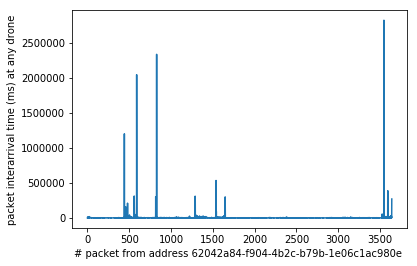

In [10]:
#drawing the delays of some non-randomized address
import matplotlib.pyplot as plt
plt.plot(delays112['62042a84-f904-4b2c-b79b-1e06c1ac980e'])
#plt.plot(delays['e1deda99-163f-4b68-9ade-e1f05d070bf2'])
plt.plot()
plt.ylabel('packet interarrival time (ms) at any drone')
plt.xlabel('# packet from address 62042a84-f904-4b2c-b79b-1e06c1ac980e ')
#axes.set_ylim([0,200])
axes = plt.gca()

plt.show()

[800, 44199, 31, 44966, 23, 721, 44255, 25, 19, 679, 44276, 23, 462, 44512, 737, 44261, 23, 447, 214, 44314, 24, 666]


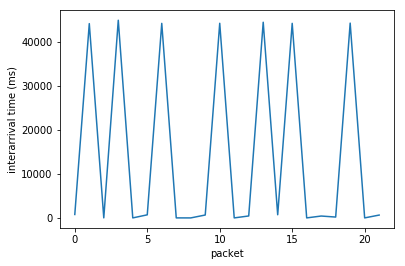

In [11]:
#drawing the delays of some randomized address
import matplotlib.pyplot as plt
plt.plot(delays112['7a43a795-b538-4563-b702-6f0256588479'])
plt.ylabel('interarrival time (ms)')
plt.xlabel('packet')
#axes.set_ylim([0,200])
axes = plt.gca()
print(delays112['7a43a795-b538-4563-b702-6f0256588479'])
plt.show()

In [12]:
print(delays112['443200e5-5752-4e5e-92f4-00af19a293be'])#a randomized address


[144882, 1390, 109, 1907, 453, 116, 562, 133927, 1666, 5170, 1128, 1028, 228, 111, 188, 374, 150, 522, 335, 714, 1534, 4045, 779, 901, 558, 905, 105, 1569, 92, 1263, 1229, 121, 1000, 450, 125, 1607, 402, 339, 328, 234, 230, 574279, 18344, 179882, 100, 1064, 3343, 680, 165, 279, 1690, 1008, 1122, 106, 347, 109, 82, 483, 446, 449, 3594, 1007, 3261, 170, 523, 204, 3466, 2611, 9, 1894, 1792, 1017, 551, 25915, 1048, 20, 503, 402, 2218, 935, 1685, 2038, 1336, 1340, 3036, 4160, 130, 19, 1046, 959, 2129, 449, 560, 97, 10, 1023, 1345, 113, 113, 17, 432, 2133, 1119, 3, 788, 677, 343, 213, 2179416, 226, 209, 685, 3027, 5731, 3469, 348, 565, 1124, 60, 724, 736, 48, 8, 56, 1194, 93, 562, 112, 669, 2025, 1911, 678, 103, 3040, 422, 17451, 903, 2698, 336, 114, 6852, 1117, 1014, 448, 451, 673, 682, 779, 2459, 579, 783, 794, 113, 107, 576, 208, 842, 395, 104, 25, 523, 14]


In [20]:
arr = np.array(delays112['32bf72d3-d707-4c37-b9b5-6318187de63f'])

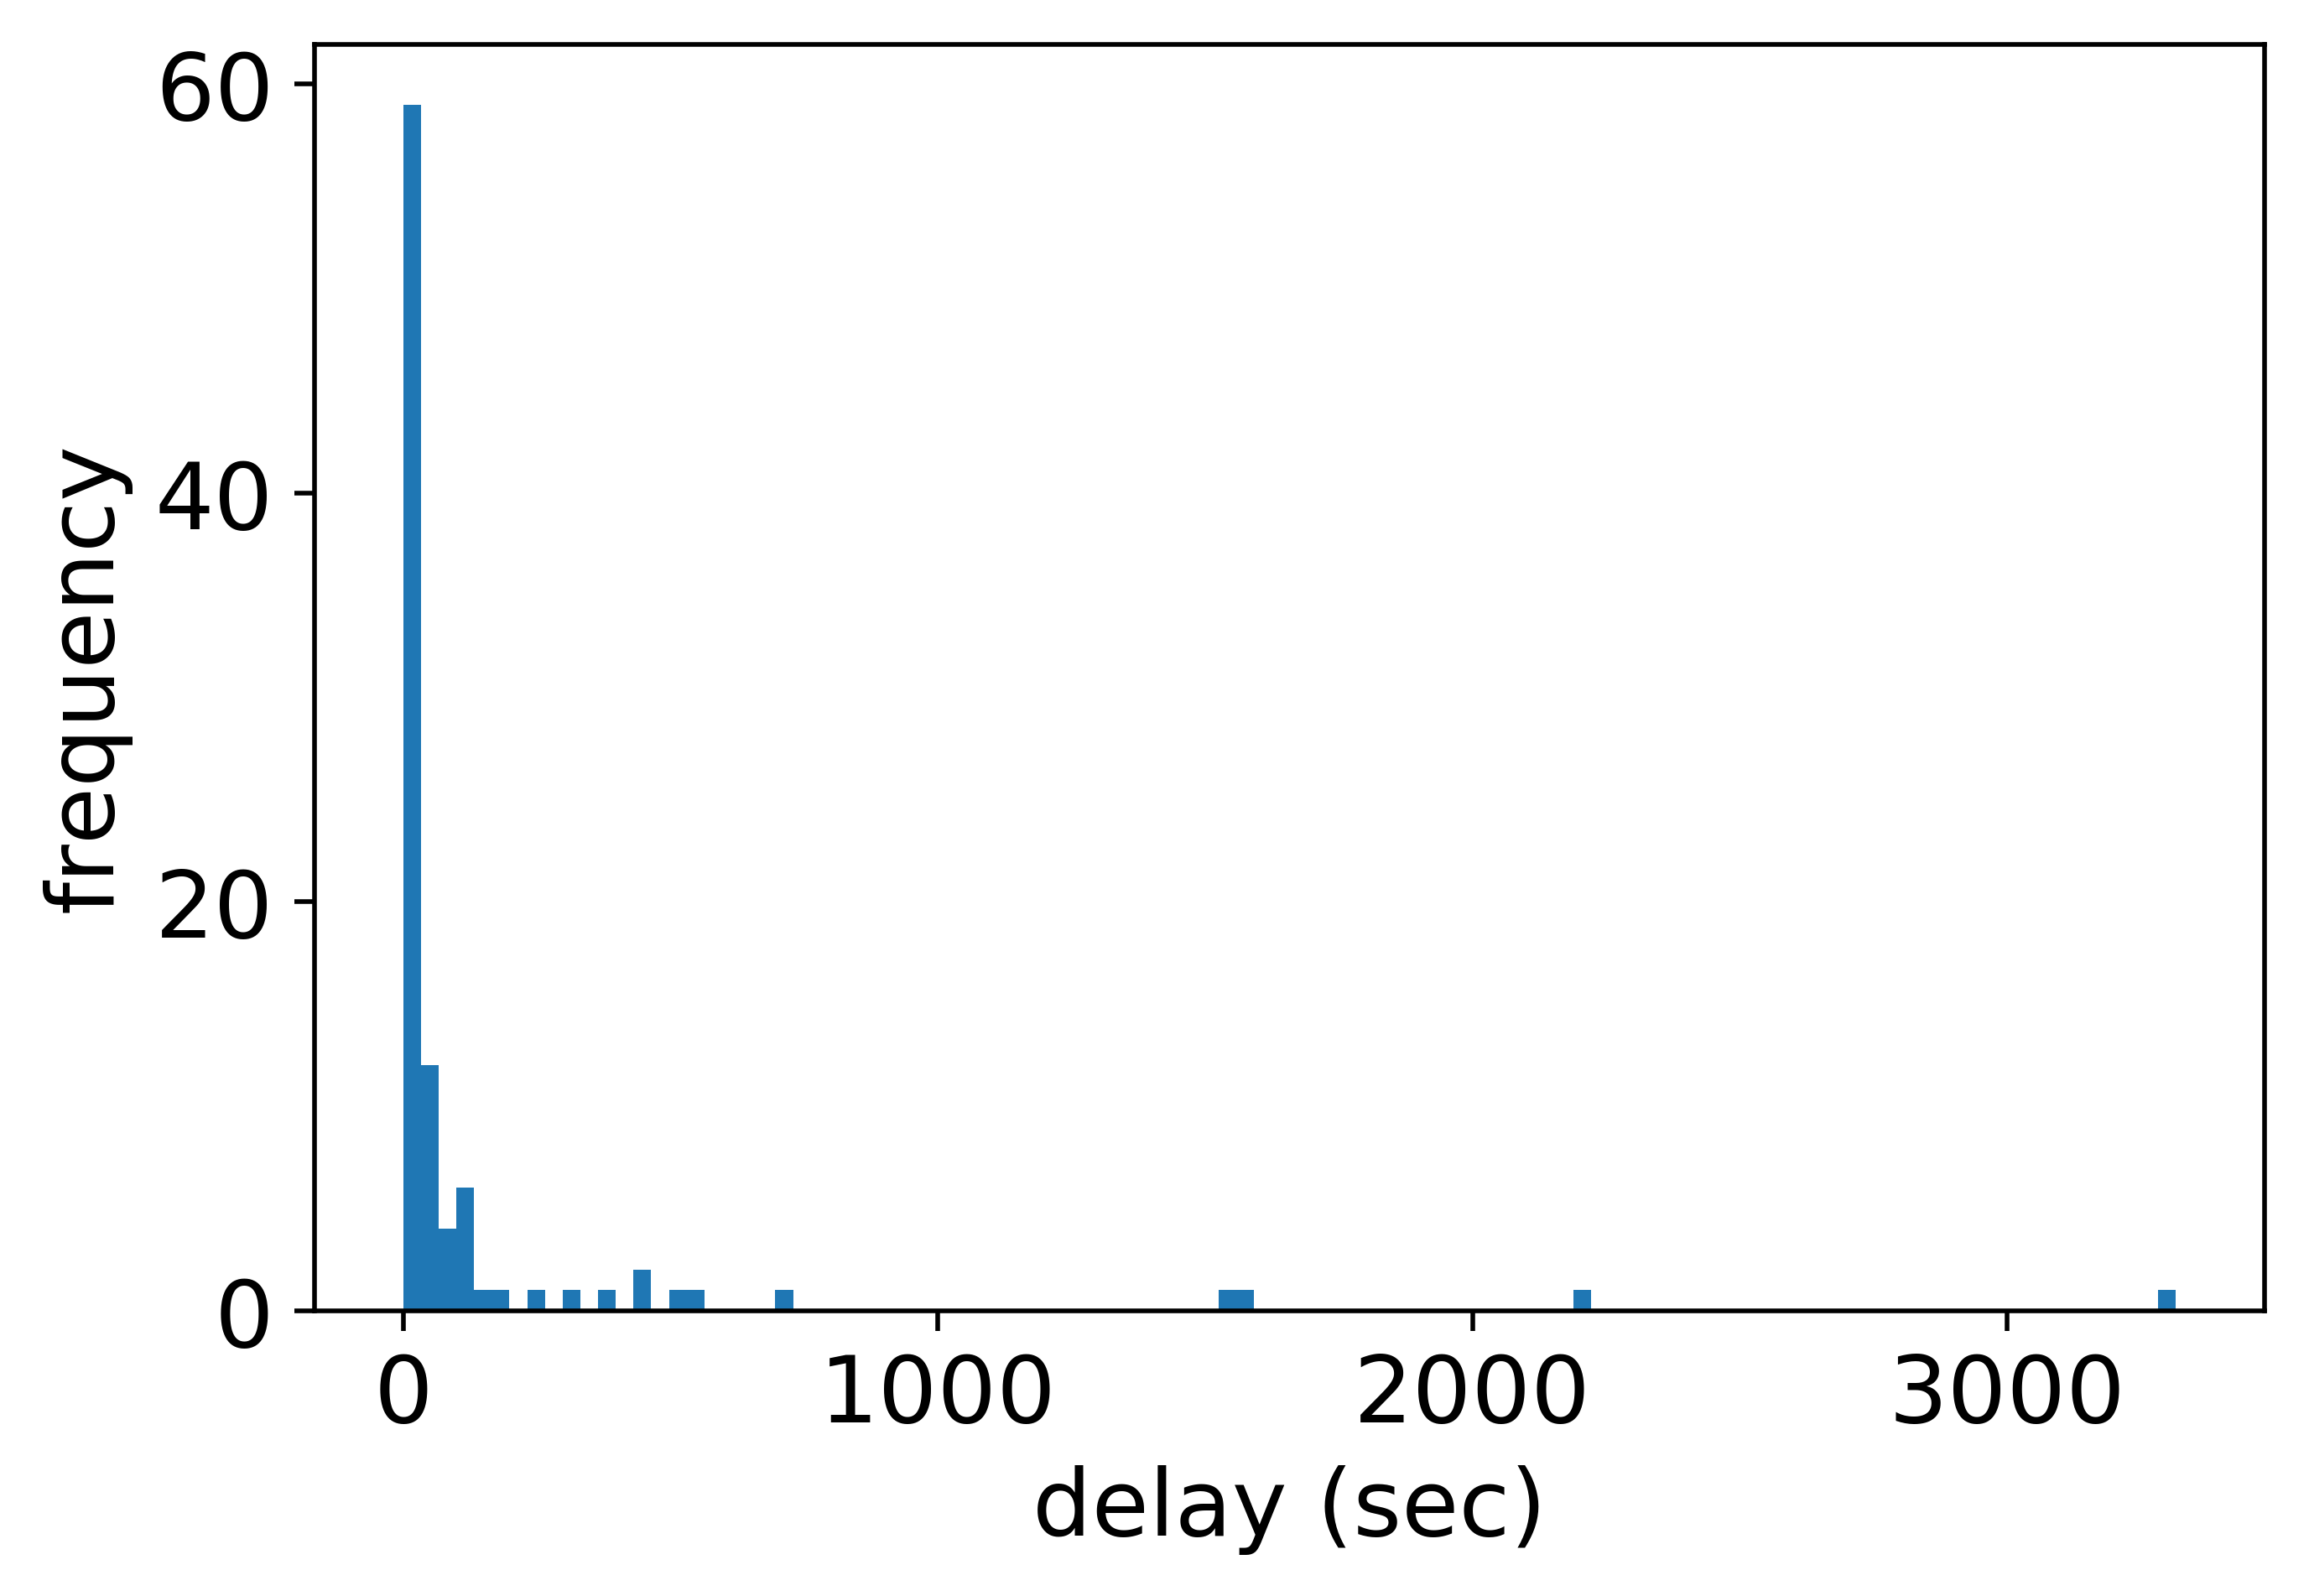

In [90]:
plt.hist(arr/1000, bins = 100)
plt.ylabel('frequency')
plt.xlabel('delay (sec)')
axes.set_xlim([0,200000])

axes = plt.gca()

plt.show()

(17.999999999966146, 151663.3250054364)


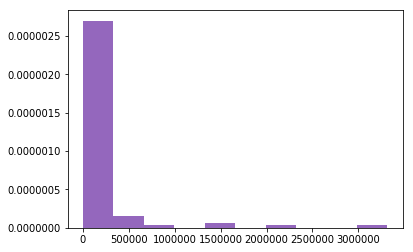

In [24]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
X = arr
P = ss.expon.fit(X)
print(P)
#plotting
rX = np.linspace(0,10, 100)
rP = ss.expon.pdf(rX, *P)
plt.hist(X, density=True)
plt.plot(rX, rP)
plt.show()

In [71]:
import math
def plotHistogramOfDictionary(dictionary, xlabel, ylabel, nbins):
    dictionaryList = []
    for address in dictionary.keys():
        dictionaryList.append(dictionary[address])
    dictArray = np.array(dictionaryList)/1000
    plt.hist(dictArray, bins = nbins)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    axes = plt.gca()
    axes.set_xlim([-100,3500])
    plt.show()

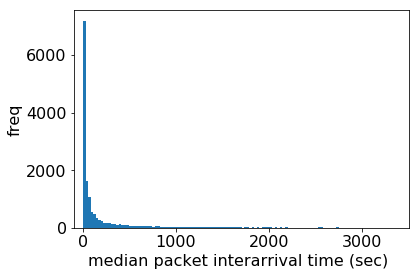

In [85]:
plotHistogramOfDictionary(medianDelay0_112,  'median packet interarrival time (sec) ', 'freq', 1000 )

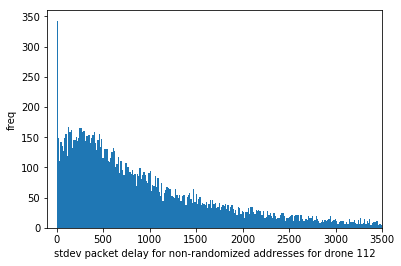

In [73]:
plotHistogramOfDictionary(stderrDelay0_112, 'stdev packet delay for non-randomized addresses for drone 112', 'freq', 2000 )

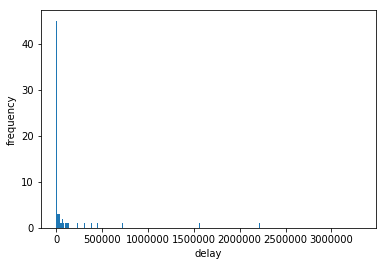

In [74]:
plt.hist(arr, bins = 500)
plt.ylabel('frequency')
plt.xlabel('delay')
axes.set_xlim([0,200000])

axes = plt.gca()

plt.show()

In [78]:
#let us check the stability of the signal strengths
# line: ['32bf72d3-d707-4c37-b9b5-6318187de63f', 0, 1436047299132, '107', -68]
# line: [address, localmac, time, drone, signal]
def GetSignalStrengthPerDroneForAddress(address):
    signalsDictionary = dict()
    for line in json_lines_raw: 
        mac = line[0]
        time = line[2]
        drone = line[3]
        signal = line[4]
        if mac == address:            
            pair=[time, signal]
            if drone not in signalsDictionary.keys():
                signalsDictionary[drone] = []                
            signalsDictionary[drone].append(pair)
    return signalsDictionary
    


In [79]:
signalsDict = GetSignalStrengthPerDroneForAddress('e1deda99-163f-4b68-9ade-e1f05d070bf2')
print(len(signalsDict))
print (signalsDict['112'])

23
[[1436047302165, -64], [1436047302139, -65], [1436047307976, -64], [1436047307853, -64], [1436047317232, -67], [1436047327862, -63], [1436047337864, -64], [1436047337869, -64], [1436047337984, -64], [1436047337861, -66], [1436047337868, -63], [1436047337983, -65], [1436047337985, -65], [1436047347147, -64], [1436047357877, -62], [1436047357876, -62], [1436047357994, -63], [1436047361911, -65], [1436047362307, -62], [1436047362278, -63], [1436047367870, -63], [1436047367882, -65], [1436047367883, -62], [1436047377416, -65], [1436047387878, -64], [1436047387879, -64], [1436047387879, -64], [1436047387997, -63], [1436047397877, -65], [1436047406936, -66], [1436047406934, -64], [1436047407542, -65], [1436047417883, -61], [1436047417886, -64], [1436047418116, -70], [1436047417885, -63], [1436047417886, -66], [1436047421936, -61], [1436047427888, -63], [1436047428778, -65], [1436047437845, -62], [1436047437853, -63], [1436047447900, -64], [1436047447897, -63], [1436047452626, -61], [14360

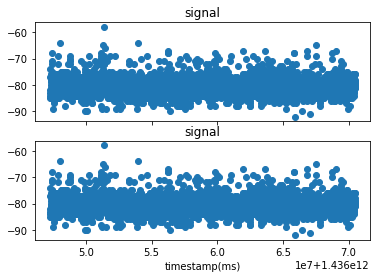

In [80]:
#drawing signal strengths for drone 126 and address e1deda99-163f-4b68-9ade-e1f05d070bf2
import numpy as np
import matplotlib.pyplot as plt

pairs = signalsDict['126']
xx = []
yy=[]
for pair in pairs:
    xx.append(pair[0])
    yy.append(pair[1])
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(xx, yy, yerr=0, fmt='o')
ax0.set_title('signal')
plt.xlabel('timestamp(ms)')

ax1.errorbar(xx, yy, yerr=0, fmt='o')
ax1.set_title('signal')

plt.show()